In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [12]:
df_train = pd.read_csv(r"D:\NTI\final_project_Podcast Listening Time\Podcast Listening Time_train.csv")
df_train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [13]:
df_test = pd.read_csv(r"D:\NTI\final_project_Podcast Listening Time\Podcast Listening Time_test.csv")
df_test.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [14]:
df_train.drop(columns=['id'], inplace=True)
df_test.drop(columns=['id'], inplace=True)

| Column                        | الوصف بالعربي                                           | Description (English)                                  |
| ----------------------------- | ------------------------------------------------------- | ------------------------------------------------------ |
| `idPodcast_Name`              | اسم البودكاست                                           | Podcast name                                           |
| `Episode_Title`               | عنوان الحلقة                                            | Title of the episode                                   |
| `Episode_Length_minutes`      | مدة الحلقة بالدقائق                                     | Length of the episode in minutes                       |
| `Genre`                       | نوع البودكاست (كوميدي، تكنولوجي...)                     | Podcast genre/category                                 |
| `Host_Popularity_percentage`  | نسبة شهرة المذيع                                        | Popularity percentage of the host                      |
| `Publication_Day`             | يوم النشر                                               | Day of publication                                     |
| `Publication_Time`            | وقت النشر (صباح، مساء...)                               | Time of publication (Morning, Evening...)              |
| `Guest_Popularity_percentage` | نسبة شهرة الضيف                                         | Popularity percentage of the guest                     |
| `Number_of_Ads`               | عدد الإعلانات في الحلقة                                 | Number of ads in the episode                           |
| `Episode_Sentiment`           | الانطباع العام للحلقة (إيجابي، سلبي، محايد)             | Sentiment of the episode (Positive, Negative, Neutral) |
| `Listening_Time_minutes`      | الوقت الفعلي الذي استمع فيه المستخدم (المتغير المستهدف) | Actual listening time in minutes (target variable)     |


In [17]:
sample = pd.read_csv(r"D:\NTI\final_project_Podcast Listening Time\sample_submission.csv")
sample.head()

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


In [18]:
df_train.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,64.504738,59.859901,52.236449,1.348855,45.437406
std,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,1.300000,0.000000,0.000000,0.000000
25%,35.730000,39.410000,28.380000,0.000000,23.178350
50%,63.840000,60.050000,53.580000,1.000000,43.379460
75%,94.070000,79.530000,76.600000,2.000000,64.811580
max,325.240000,119.460000,119.910000,103.910000,119.970000


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 750000 non-null  object 
 1   Episode_Title                750000 non-null  object 
 2   Episode_Length_minutes       662907 non-null  float64
 3   Genre                        750000 non-null  object 
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  object 
 6   Publication_Time             750000 non-null  object 
 7   Guest_Popularity_percentage  603970 non-null  float64
 8   Number_of_Ads                749999 non-null  float64
 9   Episode_Sentiment            750000 non-null  object 
 10  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 62.9+ MB


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 250000 non-null  object 
 1   Episode_Title                250000 non-null  object 
 2   Episode_Length_minutes       221264 non-null  float64
 3   Genre                        250000 non-null  object 
 4   Host_Popularity_percentage   250000 non-null  float64
 5   Publication_Day              250000 non-null  object 
 6   Publication_Time             250000 non-null  object 
 7   Guest_Popularity_percentage  201168 non-null  float64
 8   Number_of_Ads                250000 non-null  float64
 9   Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), object(6)
memory usage: 19.1+ MB


In [21]:
df_train.shape

(750000, 11)

In [22]:
df_test.shape

(250000, 10)

In [23]:
sample.shape

(250000, 2)

 # **Handling Missing Values**


In [24]:
print (df_train.isnull().sum().sort_values(ascending = False).head(5))
nanlist_train=[col for col in df_train.columns if df_train[col].isnull().any()]
nanlist_train

Guest_Popularity_percentage    146030
Episode_Length_minutes          87093
Number_of_Ads                       1
Episode_Title                       0
Podcast_Name                        0
dtype: int64


['Episode_Length_minutes', 'Guest_Popularity_percentage', 'Number_of_Ads']

In [25]:
print (df_test.isnull().sum().sort_values(ascending = False).head(5))
nanlist=[col for col in df_test.columns if df_test[col].isnull().any()]
nanlist

Guest_Popularity_percentage    48832
Episode_Length_minutes         28736
Episode_Title                      0
Podcast_Name                       0
Host_Popularity_percentage         0
dtype: int64


['Episode_Length_minutes', 'Guest_Popularity_percentage']

In [26]:
skew_vals = df_train[nanlist_train].skew()
skew_vals

Episode_Length_minutes        -0.002006
Guest_Popularity_percentage   -0.107035
Number_of_Ads                  6.032992
dtype: float64

In [27]:
df_train.dropna(subset=["Number_of_Ads"], inplace=True)

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(df_train[nanlist])
df_test[nanlist] = imputer.transform(df_test[nanlist])


In [29]:
df_train = df_train.dropna(subset=nanlist)


# **Handling Outliers**

In [30]:
num_cols = df_train.select_dtypes(include=['float64']).columns
obj_cols = df_train.select_dtypes(include=['object']).columns
print (num_cols)
print (obj_cols)

Index(['Episode_Length_minutes', 'Host_Popularity_percentage',
       'Guest_Popularity_percentage', 'Number_of_Ads',
       'Listening_Time_minutes'],
      dtype='object')
Index(['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day',
       'Publication_Time', 'Episode_Sentiment'],
      dtype='object')


In [31]:
for col in num_cols:
    q1 = df_train[col].quantile(0.25)
    q3 = df_train[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    print(col, '→', 'Lower:', lower, ', Upper:', upper)


Episode_Length_minutes → Lower: -51.15499999999999 , Upper: 181.125
Host_Popularity_percentage → Lower: -20.65500000000001 , Upper: 139.38500000000002
Guest_Popularity_percentage → Lower: -44.38499999999998 , Upper: 149.33499999999998
Number_of_Ads → Lower: -3.0 , Upper: 5.0
Listening_Time_minutes → Lower: -39.5070725 , Upper: 128.0122675


In [32]:
df_train.loc[df_train['Number_of_Ads'] > 5, 'Number_of_Ads'] = np.nan

In [33]:
skew_vals = df_train['Number_of_Ads'].skew()
skew_vals

np.float64(0.25329202014952007)

In [34]:
val = df_train['Number_of_Ads'].mean()
df_train['Number_of_Ads'].fillna(val, inplace=True)
df_test['Number_of_Ads'].fillna(val, inplace=True)

In [35]:
lower, upper = -36.915, 166.645

df_train['Episode_Length_minutes'] = np.where(
    df_train['Episode_Length_minutes'] > upper, upper,
    np.where(df_train['Episode_Length_minutes'] < lower, lower, df_train['Episode_Length_minutes'])
)

df_test['Episode_Length_minutes'] = np.where(
    df_test['Episode_Length_minutes'] > upper, upper,
    np.where(df_test['Episode_Length_minutes'] < lower, lower, df_test['Episode_Length_minutes'])
)

# **Encoding Categorical Variables**


In [36]:
for col in obj_cols:
    print([col])
    print(f'number of column {col} is : ',df_train[col].nunique())
    print(f'number of column {col} is : ',df_train[col].unique())

['Podcast_Name']
number of column Podcast_Name is :  48
number of column Podcast_Name is :  ['Joke Junction' 'Study Sessions' 'Digital Digest' 'Mind & Body'
 'Criminal Minds' 'News Roundup' 'Sports Central' 'Melody Mix' 'Game Day'
 'Gadget Geek' 'Global News' 'Tech Talks' 'Sport Spot' 'Business Briefs'
 'Tech Trends' 'Innovators' 'Comedy Corner' 'Fitness First' 'Funny Folks'
 'Music Matters' 'Brain Boost' "Athlete's Arena" 'Wellness Wave'
 'Sports Weekly' 'World Watch' 'Humor Hub' 'Style Guide' 'Money Matters'
 'Healthy Living' 'Home & Living' 'Educational Nuggets' 'Mystery Matters'
 'Learning Lab' 'Lifestyle Lounge' 'Crime Chronicles' 'Life Lessons'
 'Current Affairs' 'Daily Digest' 'Finance Focus' 'Laugh Line'
 'True Crime Stories' 'Detective Diaries' 'Business Insights'
 'Fashion Forward' 'Market Masters' 'Tune Time' 'Sound Waves'
 'Health Hour']
['Episode_Title']
number of column Episode_Title is :  100
number of column Episode_Title is :  ['Episode 26' 'Episode 16' 'Episode 45' 'E

In [37]:
for col in obj_cols:
    print([col])
    print(f'number of column {col} is : ',df_test[col].nunique())
    print(f'number of column {col} is : ',df_test[col].unique())

['Podcast_Name']
number of column Podcast_Name is :  48
number of column Podcast_Name is :  ['Educational Nuggets' 'Sound Waves' 'Joke Junction' 'Comedy Corner'
 'Life Lessons' 'Money Matters' 'Mystery Matters' 'Gadget Geek'
 'Home & Living' 'True Crime Stories' 'Finance Focus' 'Innovators'
 'Crime Chronicles' 'Tech Talks' 'Style Guide' 'World Watch'
 'Sports Weekly' 'Global News' 'Humor Hub' 'Business Insights'
 'Sport Spot' 'Digital Digest' 'Fashion Forward' 'Sports Central'
 'Funny Folks' 'Tech Trends' 'Laugh Line' 'Detective Diaries'
 'Mind & Body' 'Fitness First' 'Tune Time' 'Lifestyle Lounge'
 'Business Briefs' 'Wellness Wave' 'Market Masters' 'Melody Mix'
 'Health Hour' 'Study Sessions' 'Daily Digest' 'Healthy Living'
 'Learning Lab' 'Music Matters' 'Brain Boost' 'Game Day' "Athlete's Arena"
 'Criminal Minds' 'Current Affairs' 'News Roundup']
['Episode_Title']
number of column Episode_Title is :  100
number of column Episode_Title is :  ['Episode 73' 'Episode 23' 'Episode 11' 'E

In [38]:
df_train['Episode_Number'] = df_train['Episode_Title'].str.extract('(\d+)').astype(int)
df_test['Episode_Number'] = df_test['Episode_Title'].str.extract('(\d+)').astype(int)
df_train.drop('Episode_Title', axis=1, inplace=True)
df_test.drop('Episode_Title', axis=1, inplace=True)

In [39]:
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df_train['Episode_Sentiment'] = df_train['Episode_Sentiment'].map(sentiment_map)
df_test['Episode_Sentiment'] = df_test['Episode_Sentiment'].map(sentiment_map)


In [40]:
from sklearn.preprocessing import LabelEncoder
le_podcast = LabelEncoder()
df_train['Podcast_Name'] = le_podcast.fit_transform(df_train['Podcast_Name'])
df_test['Podcast_Name'] = le_podcast.transform(df_test['Podcast_Name'])
print("Label Encoding for Podcast_Name completed.")

Label Encoding for Podcast_Name completed.


In [41]:
from sklearn.preprocessing import OneHotEncoder
onehot_cols = ['Genre', 'Publication_Day', 'Publication_Time']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

train_encoded = ohe.fit_transform(df_train[onehot_cols])
train_encoded_df = pd.DataFrame(train_encoded, columns=ohe.get_feature_names_out(onehot_cols), index=df_train.index)

test_encoded = ohe.transform(df_test[onehot_cols])
test_encoded_df = pd.DataFrame(test_encoded, columns=ohe.get_feature_names_out(onehot_cols), index=df_test.index)

df_train.drop(columns=onehot_cols, inplace=True)
df_test.drop(columns=onehot_cols, inplace=True)

df_train = pd.concat([df_train, train_encoded_df], axis=1)
df_test = pd.concat([df_test, test_encoded_df], axis=1)

print("One-Hot Encoding completed. Train shape:", df_train.shape)
print("One-Hot Encoding completed. Test shape:", df_test.shape)


One-Hot Encoding completed. Train shape: (539048, 29)
One-Hot Encoding completed. Test shape: (250000, 28)


In [42]:
df_train.columns

Index(['Podcast_Name', 'Episode_Length_minutes', 'Host_Popularity_percentage',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes', 'Episode_Number', 'Genre_Business',
       'Genre_Comedy', 'Genre_Education', 'Genre_Health', 'Genre_Lifestyle',
       'Genre_Music', 'Genre_News', 'Genre_Sports', 'Genre_Technology',
       'Genre_True Crime', 'Publication_Day_Friday', 'Publication_Day_Monday',
       'Publication_Day_Saturday', 'Publication_Day_Sunday',
       'Publication_Day_Thursday', 'Publication_Day_Tuesday',
       'Publication_Day_Wednesday', 'Publication_Time_Afternoon',
       'Publication_Time_Evening', 'Publication_Time_Morning',
       'Publication_Time_Night'],
      dtype='object')

# *understanding data with visulization*

<Axes: >

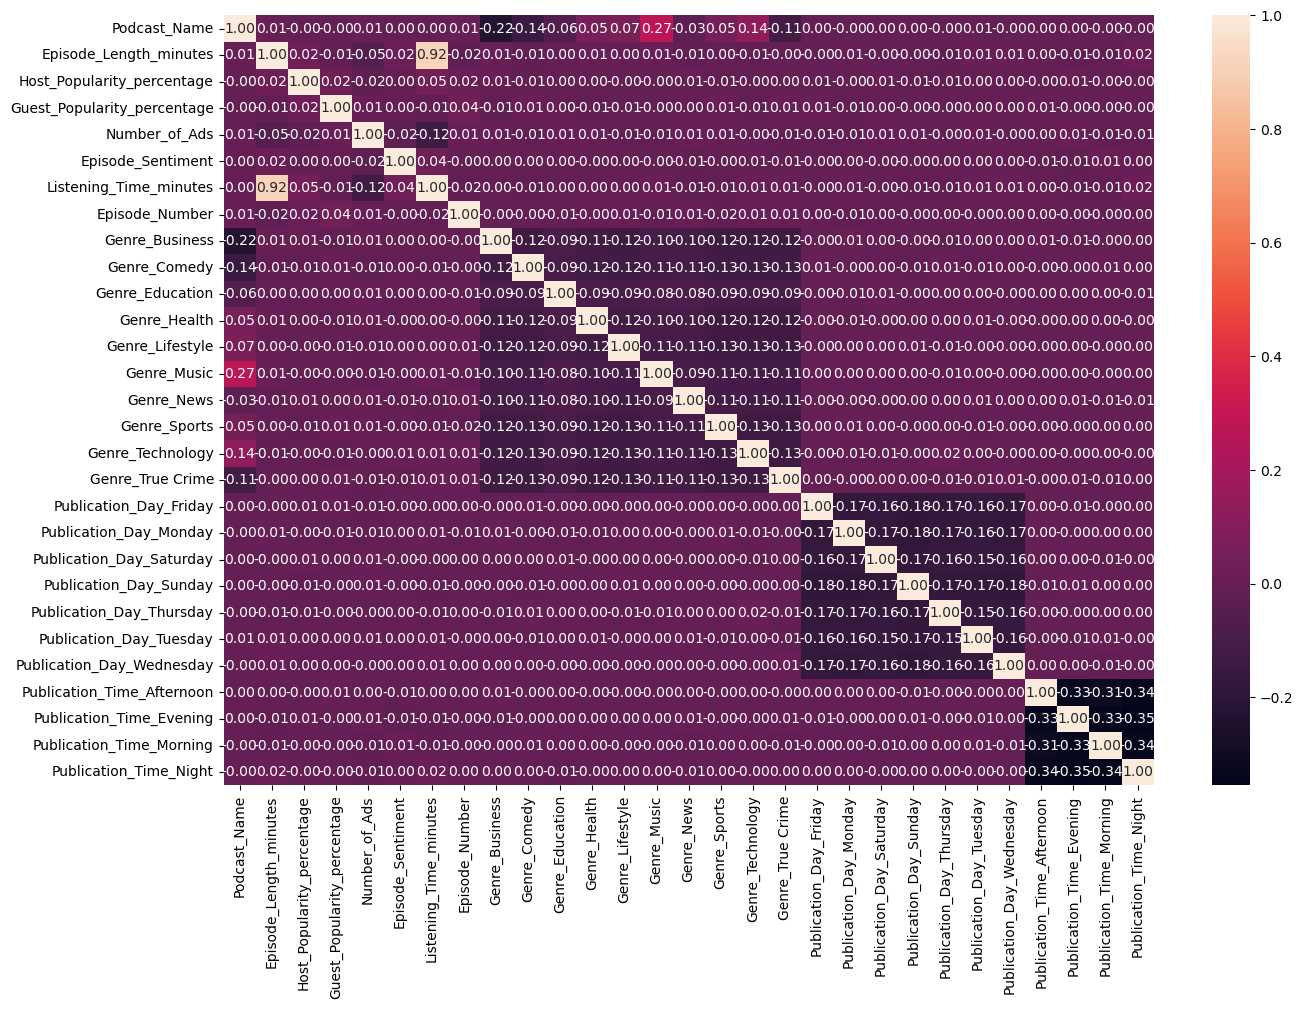

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True,fmt='.2f')

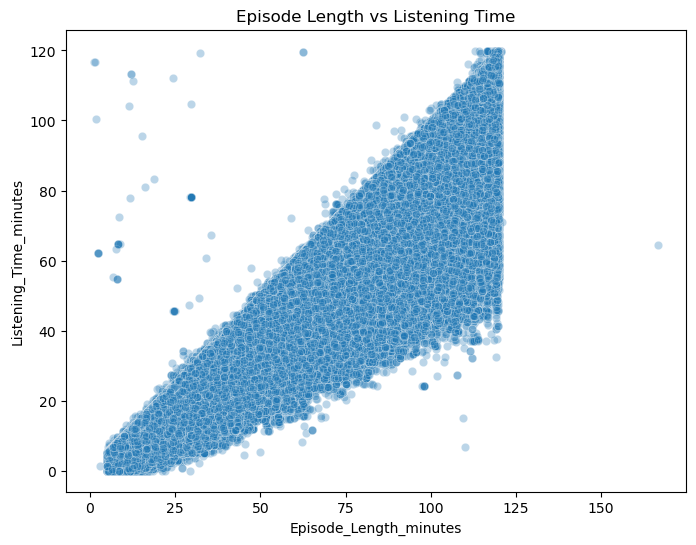

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Episode_Length_minutes', y='Listening_Time_minutes', data=df_train, alpha=0.3)
plt.title('Episode Length vs Listening Time')
plt.show()


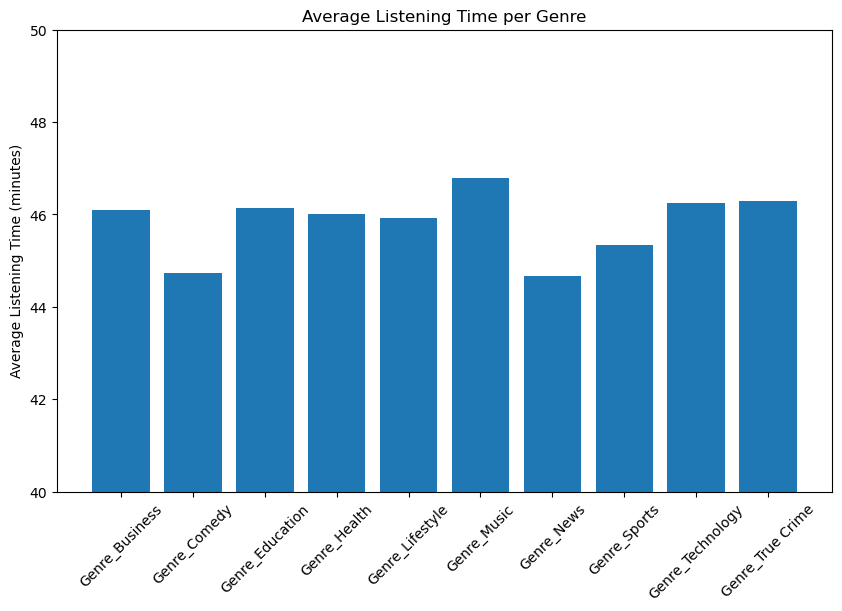

In [45]:
genre_cols = [col for col in df_train.columns if col.startswith('Genre_')]
avg_listening = {}
for col in genre_cols:
    avg_listening[col] = df_train.loc[df_train[col] == 1, 'Listening_Time_minutes'].mean()
plt.figure(figsize=(10,6))
plt.bar(avg_listening.keys(), avg_listening.values())
plt.xticks(rotation=45)
plt.ylabel('Average Listening Time (minutes)')
plt.title('Average Listening Time per Genre')
plt.ylim(40, 50)
plt.show()


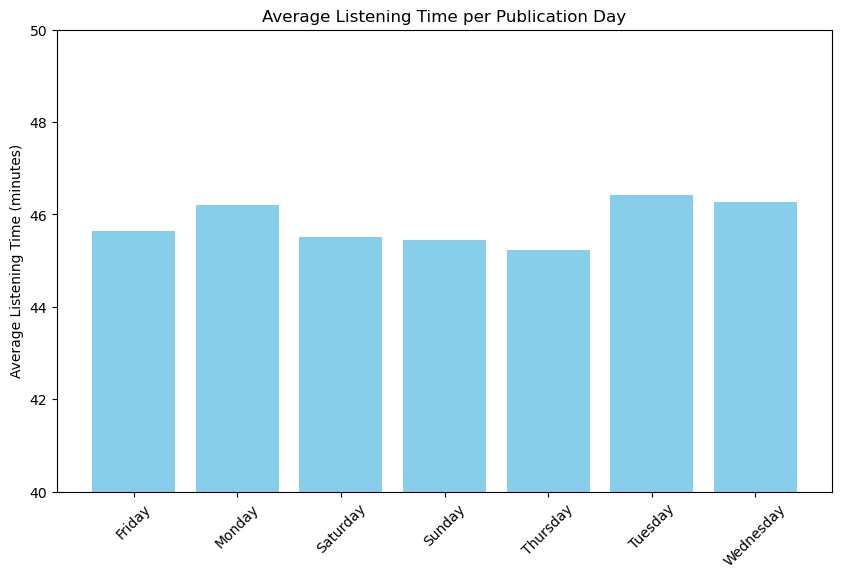

In [46]:
pub_day_cols = [col for col in df_train.columns if col.startswith('Publication_Day_')]
avg_listening = {col.replace('Publication_Day_', ''): df_train.loc[df_train[col] == 1, 'Listening_Time_minutes'].mean() for col in pub_day_cols}

plt.figure(figsize=(10,6))
plt.bar(avg_listening.keys(), avg_listening.values(), color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('Average Listening Time (minutes)')
plt.title('Average Listening Time per Publication Day')
plt.ylim(40, 50)

plt.show()


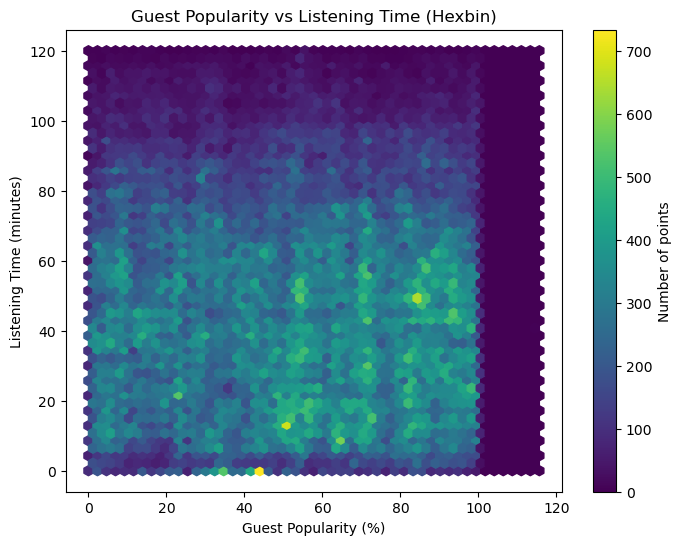

In [47]:
plt.figure(figsize=(8,6))
plt.hexbin(df_train['Guest_Popularity_percentage'],
           df_train['Listening_Time_minutes'],
           gridsize=50, cmap='viridis')
plt.colorbar(label='Number of points')
plt.xlabel('Guest Popularity (%)')
plt.ylabel('Listening Time (minutes)')
plt.title('Guest Popularity vs Listening Time (Hexbin)')
plt.show()


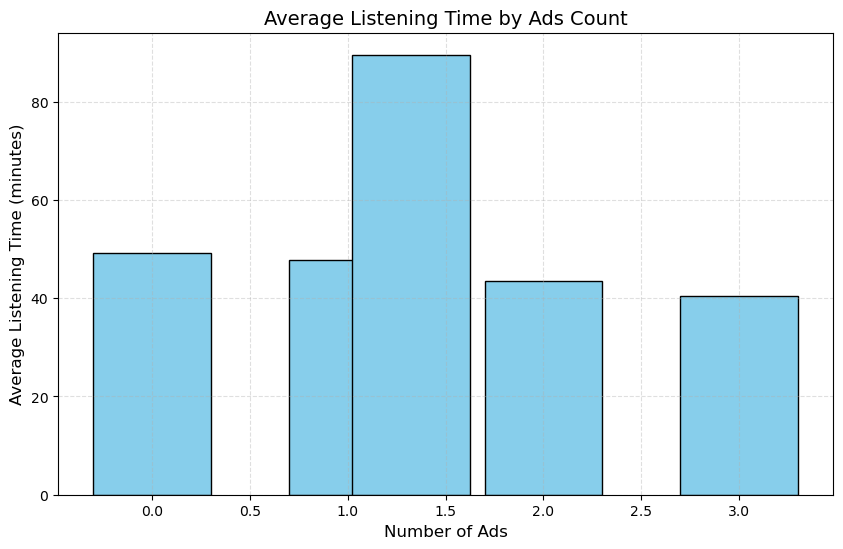

In [48]:
ads_sorted = sorted(df_train['Number_of_Ads'].unique())

avg_listening = [
    df_train[df_train['Number_of_Ads'] == a]['Listening_Time_minutes'].mean()
    for a in ads_sorted
]

plt.figure(figsize=(10,6))
plt.bar(ads_sorted, avg_listening, width=0.6, color='skyblue', edgecolor='black')

plt.xlabel('Number of Ads', fontsize=12)
plt.ylabel('Average Listening Time (minutes)', fontsize=12)
plt.title('Average Listening Time by Ads Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()


# *model traning*


In [49]:
X_full = df_train.drop("Listening_Time_minutes", axis=1)
y_full = df_train["Listening_Time_minutes"]

sample_size = 20000
X_sample = X_full.sample(sample_size, random_state=42)
y_sample = y_full.loc[X_sample.index]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

print(f"Training set: {len(X_train)} rows, Testing set: {len(X_test)} rows")


Training set: 16000 rows, Testing set: 4000 rows


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models = {
    "Linear Regression": LinearRegression(),
    "KNN Regression": KNeighborsRegressor(n_neighbors=50),
    "Support Vector Regressor": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Bagging": BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=10), n_estimators=50, random_state=42),
    "HistGradient Boosting": HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=50, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=100, learning_rate=0.1, verbose=0)
}

In [54]:
import numpy as np
import pandas as pd
from sklearn.metrics import (mean_squared_error,mean_absolute_error,r2_score,explained_variance_score)

predictions = {}
results = []

for name, model in models.items():
    print(f"\nStarting training: {name} ...")
    model.fit(X_train, y_train)
    print(f"Finished training: {name}")

    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    results.append({
        "Model": name,
        "R2": round(r2_score(y_test, y_pred), 4),
        "MSE": round(mean_squared_error(y_test, y_pred), 4),
        "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred)), 4),
        "MAE": round(mean_absolute_error(y_test, y_pred), 4)
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2", ascending=False).reset_index(drop=True)

display(results_df)



Starting training: Linear Regression ...
Finished training: Linear Regression

Starting training: KNN Regression ...
Finished training: KNN Regression

Starting training: Support Vector Regressor ...
Finished training: Support Vector Regressor

Starting training: Decision Tree ...
Finished training: Decision Tree

Starting training: Random Forest ...
Finished training: Random Forest

Starting training: Gradient Boosting ...
Finished training: Gradient Boosting

Starting training: Bagging ...
Finished training: Bagging

Starting training: HistGradient Boosting ...
Finished training: HistGradient Boosting

Starting training: Extra Trees ...
Finished training: Extra Trees

Starting training: AdaBoost ...
Finished training: AdaBoost

Starting training: LightGBM ...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[

,Model,R2,MSE,RMSE,MAE
0,CatBoost,0.8545,106.0477,10.2979,7.9709
1,Gradient Boosting,0.8543,106.2407,10.3073,7.9643
2,HistGradient Boosting,0.8538,106.6090,10.3252,7.9661
3,XGBoost,0.8530,107.1608,10.3518,7.9647
4,LightGBM,0.8518,108.0511,10.3948,8.0017
5,Bagging,0.8512,108.4469,10.4138,8.0181
6,Linear Regression,0.8489,110.1509,10.4953,8.1263
7,Random Forest,0.8476,111.1178,10.5412,8.0945
8,AdaBoost,0.8420,115.1786,10.7321,8.3884
9,Extra Trees,0.8394,117.0800,10.8204,8.2190


In [55]:
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split( X_full, y_full, test_size=0.2, random_state=40)

print(f"New split -> Training set: {len(X_all_train)} rows, Testing set: {len(X_all_test)} rows")


New split -> Training set: 431238 rows, Testing set: 107810 rows


In [56]:
best_model = models["CatBoost"]

best_model.fit(X_all_train, y_all_train)

y_all_pred = best_model.predict(X_all_test)

metrics = {
    "R2": round(r2_score(y_all_test, y_all_pred), 4),
    "MSE": round(mean_squared_error(y_all_test, y_all_pred), 4),
    "RMSE": round(np.sqrt(mean_squared_error(y_all_test, y_all_pred)), 4),
    "MAE": round(mean_absolute_error(y_all_test, y_all_pred), 4)
}
print(metrics)


{'R2': 0.8512, 'MSE': 110.4502, 'RMSE': np.float64(10.5095), 'MAE': 8.1095}


In [57]:
test_predictions = best_model.predict(df_test)

In [58]:
submission = sample.copy()
submission["Listening_Time_minutes"] = test_predictions

submission.to_csv("submission.csv", index=False)
submission.head(10)


,id,Listening_Time_minutes
0,750000,56.838872
1,750001,17.472014
2,750002,50.283024
3,750003,80.841473
4,750004,49.336254
5,750005,22.881212
6,750006,87.836959
7,750007,40.321921
8,750008,68.694430
9,750009,73.469052
